In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

np.set_printoptions(suppress=True)

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

theta_list = []
checkpoint_list = []

period = ['jun-jul'] # inputs: 'may-jun', 'jun-jul'

# Import data

X_2014 = np.load('../data/processed/data_2014.npz')
N_2014 = X_2014['N']
    

X_2015 = np.load('../data/processed/data_2015.npz')
N_2015 = X_2015['N']
    

X_2016 = np.load('../data/processed/data_2016.npz')
N_2016 = X_2016['N']
    

X_2017 = np.load('../data/processed/data_2017.npz')
N_2017 = X_2017['N']

dist_2014 = X_2014['distance']
tI1_2014 = X_2014['tI1'].reshape(N_2014,1)
tI2_2014 = X_2014['tI2'].reshape(N_2014,1)
sI2_2014 = X_2014['sI2'].reshape(N_2014,1)

y_apr_2014 = X_2014['y_apr'].reshape(N_2014,1)
y_may_2014 = X_2014['y_may'].reshape(N_2014,1)
y_jun_2014 = X_2014['y_jun'].reshape(N_2014,1)
y_jul_2014 = X_2014['y_jul'].reshape(N_2014,1)

n_apr_2014 = X_2014['n_apr'].reshape(N_2014,1)
n_may_2014 = X_2014['n_may'].reshape(N_2014,1)
n_jun_2014 = X_2014['n_jun'].reshape(N_2014,1)
n_jul_2014 = X_2014['n_jul'].reshape(N_2014,1)

a_apr_2014 = X_2014['a_apr'].reshape(N_2014,1)
a_may_2014 = X_2014['a_may'].reshape(N_2014,1)
a_jun_2014 = X_2014['a_jun'].reshape(N_2014,1)
a_jul_2014 = X_2014['a_jul'].reshape(N_2014,1)

w_apr_2014 = X_2014['wind_apr']
w_may_2014 = X_2014['wind_may']
w_jun_2014 = X_2014['wind_jun']
w_jul_2014 = X_2014['wind_jul']

sI1_apr_2014 = X_2014['sI1_apr'].reshape(N_2014,1)
sI1_may_2014 = X_2014['sI1_may'].reshape(N_2014,1)
sI1_jun_2014 = X_2014['sI1_jun'].reshape(N_2014,1)
sI1_jul_2014 = X_2014['sI1_jul'].reshape(N_2014,1)

s_apr_2014 = X_2014['s_apr'].reshape(N_2014,1)
s_may_2014 = X_2014['s_may'].reshape(N_2014,1)
s_jun_2014 = X_2014['s_jun'].reshape(N_2014,1)
s_jul_2014 = X_2014['s_jul'].reshape(N_2014,1)

dist_2015 = X_2015['distance']
tI1_2015 = X_2015['tI1'].reshape(N_2015,1)
tI2_2015 = X_2015['tI2'].reshape(N_2015,1)
sI2_2015 = X_2015['sI2'].reshape(N_2015,1)

y_apr_2015 = X_2015['y_apr'].reshape(N_2015,1)
y_may_2015 = X_2015['y_may'].reshape(N_2015,1)
y_jun_2015 = X_2015['y_jun'].reshape(N_2015,1)
y_jul_2015 = X_2015['y_jul'].reshape(N_2015,1)

n_apr_2015 = X_2015['n_apr'].reshape(N_2015,1)
n_may_2015 = X_2015['n_may'].reshape(N_2015,1)
n_jun_2015 = X_2015['n_jun'].reshape(N_2015,1)
n_jul_2015 = X_2015['n_jul'].reshape(N_2015,1)

a_apr_2015 = X_2015['a_apr'].reshape(N_2015,1)
a_may_2015 = X_2015['a_may'].reshape(N_2015,1)
a_jun_2015 = X_2015['a_jun'].reshape(N_2015,1)
a_jul_2015 = X_2015['a_jul'].reshape(N_2015,1)

w_apr_2015 = X_2015['wind_apr']
w_may_2015 = X_2015['wind_may']
w_jun_2015 = X_2015['wind_jun']
w_jul_2015 = X_2015['wind_jul']

sI1_apr_2015 = X_2015['sI1_apr'].reshape(N_2015,1)
sI1_may_2015 = X_2015['sI1_may'].reshape(N_2015,1)
sI1_jun_2015 = X_2015['sI1_jun'].reshape(N_2015,1)
sI1_jul_2015 = X_2015['sI1_jul'].reshape(N_2015,1)

s_apr_2015 = X_2015['s_apr'].reshape(N_2015,1)
s_may_2015 = X_2015['s_may'].reshape(N_2015,1)
s_jun_2015 = X_2015['s_jun'].reshape(N_2015,1)
s_jul_2015 = X_2015['s_jul'].reshape(N_2015,1)


dist_2016 = X_2016['distance']
tI1_2016 = X_2016['tI1'].reshape(N_2016,1)
tI2_2016 = X_2016['tI2'].reshape(N_2016,1)
sI2_2016 = X_2016['sI2'].reshape(N_2016,1)

y_apr_2016 = X_2016['y_apr'].reshape(N_2016,1)
y_may_2016 = X_2016['y_may'].reshape(N_2016,1)
y_jun_2016 = X_2016['y_jun'].reshape(N_2016,1)
y_jul_2016 = X_2016['y_jul'].reshape(N_2016,1)

n_apr_2016 = X_2016['n_apr'].reshape(N_2016,1)
n_may_2016 = X_2016['n_may'].reshape(N_2016,1)
n_jun_2016 = X_2016['n_jun'].reshape(N_2016,1)
n_jul_2016 = X_2016['n_jul'].reshape(N_2016,1)

a_apr_2016 = X_2016['a_apr'].reshape(N_2016,1)
a_may_2016 = X_2016['a_may'].reshape(N_2016,1)
a_jun_2016 = X_2016['a_jun'].reshape(N_2016,1)
a_jul_2016 = X_2016['a_jul'].reshape(N_2016,1)

w_apr_2016 = X_2016['wind_apr']
w_may_2016 = X_2016['wind_may']
w_jun_2016 = X_2016['wind_jun']
w_jul_2016 = X_2016['wind_jul']

sI1_apr_2016 = X_2016['sI1_apr'].reshape(N_2016,1)
sI1_may_2016 = X_2016['sI1_may'].reshape(N_2016,1)
sI1_jun_2016 = X_2016['sI1_jun'].reshape(N_2016,1)
sI1_jul_2016 = X_2016['sI1_jul'].reshape(N_2016,1)

s_apr_2016 = X_2016['s_apr'].reshape(N_2016,1)
s_may_2016 = X_2016['s_may'].reshape(N_2016,1)
s_jun_2016 = X_2016['s_jun'].reshape(N_2016,1)
s_jul_2016 = X_2016['s_jul'].reshape(N_2016,1)

dist_2017 = X_2017['distance']
tI1_2017 = X_2017['tI1'].reshape(N_2017,1)
tI2_2017 = X_2017['tI2'].reshape(N_2017,1)
sI2_2017 = X_2017['sI2'].reshape(N_2017,1)

y_apr_2017 = X_2017['y_apr'].reshape(N_2017,1)
y_may_2017 = X_2017['y_may'].reshape(N_2017,1)
y_jun_2017 = X_2017['y_jun'].reshape(N_2017,1)
y_jul_2017 = X_2017['y_jul'].reshape(N_2017,1)

n_apr_2017 = X_2017['n_apr'].reshape(N_2017,1)
n_may_2017 = X_2017['n_may'].reshape(N_2017,1)
n_jun_2017 = X_2017['n_jun'].reshape(N_2017,1)
n_jul_2017 = X_2017['n_jul'].reshape(N_2017,1)

a_apr_2017 = X_2017['a_apr'].reshape(N_2017,1)
a_may_2017 = X_2017['a_may'].reshape(N_2017,1)
a_jun_2017 = X_2017['a_jun'].reshape(N_2017,1)
a_jul_2017 = X_2017['a_jul'].reshape(N_2017,1)

w_apr_2017 = X_2017['wind_apr']
w_may_2017 = X_2017['wind_may']
w_jun_2017 = X_2017['wind_jun']
w_jul_2017 = X_2017['wind_jul']

sI1_apr_2017 = X_2017['sI1_apr'].reshape(N_2017,1)
sI1_may_2017 = X_2017['sI1_may'].reshape(N_2017,1)
sI1_jun_2017 = X_2017['sI1_jun'].reshape(N_2017,1)
sI1_jul_2017 = X_2017['sI1_jul'].reshape(N_2017,1)

s_apr_2017 = X_2017['s_apr'].reshape(N_2017,1)
s_may_2017 = X_2017['s_may'].reshape(N_2017,1)
s_jun_2017 = X_2017['s_jun'].reshape(N_2017,1)
s_jul_2017 = X_2017['s_jul'].reshape(N_2017,1)

N = N_2014 + N_2015 + N_2016 + N_2017


# Concatenate data for all years for the auto-infection component
y_may = np.vstack((y_may_2014, y_may_2015, y_may_2016, y_may_2017))
y_jun = np.vstack((y_jun_2014, y_jun_2015, y_jun_2016, y_jun_2017))
y_jul = np.vstack((y_jul_2014, y_jul_2015, y_jul_2016, y_jul_2017))

n_may = np.vstack((n_may_2014, n_may_2015, n_may_2016, n_may_2017))
n_jun = np.vstack((n_jun_2014, n_jun_2015, n_jun_2016, n_jun_2017))
n_jul = np.vstack((n_jul_2014, n_jul_2015, n_jul_2016, n_jul_2017))

s_may = np.vstack((s_may_2014, s_may_2015, s_may_2016, s_may_2017))
s_jun = np.vstack((s_jun_2014, s_jun_2015, s_jun_2016, s_jun_2017))
s_jul = np.vstack((s_jul_2014, s_jul_2015, s_jul_2016, s_jul_2017))

tI1_all = np.vstack((tI1_2014, tI1_2015, tI1_2016, tI1_2017))
tI2_all = np.vstack((tI2_2014, tI2_2015, tI2_2016, tI2_2017))




# Function to normalize the data
def norm(x):
    
    return (x - np.min(x)) / (np.max(x) - np.min(x))

# Normalize the data
dist_2014 = norm(dist_2014)
dist_2015 = norm(dist_2015)
dist_2016 = norm(dist_2016)
dist_2017 = norm(dist_2017)

a_apr_2014 = norm(a_apr_2014)
a_may_2014 = norm(a_may_2014)
a_jun_2014 = norm(a_jun_2014)
a_jul_2014 = norm(a_jul_2014)

a_apr_2015 = norm(a_apr_2015)
a_may_2015 = norm(a_may_2015)
a_jun_2015 = norm(a_jun_2015)
a_jul_2015 = norm(a_jul_2015)

a_apr_2016 = norm(a_apr_2016)
a_may_2016 = norm(a_may_2016)
a_jun_2016 = norm(a_jun_2016)
a_jul_2016 = norm(a_jul_2016)

a_apr_2017 = norm(a_apr_2017)
a_may_2017 = norm(a_may_2017)
a_jun_2017 = norm(a_jun_2017)
a_jul_2017 = norm(a_jul_2017)


for period in period:

    if period == 'may-jun':
        y = y_jun
        n = n_jun
        
        y_lag = y_may
        n_lag = n_may
        
        a_lag_2014 = a_may_2014
        a_lag_2015 = a_may_2015
        a_lag_2016 = a_may_2016
        a_lag_2017 = a_may_2017
        
        w_lag_2014 = w_may_2014
        w_lag_2015 = w_may_2015
        w_lag_2016 = w_may_2016
        w_lag_2017 = w_may_2017
        
        sI1_lag_2014 = sI1_may_2014
        sI1_lag_2015 = sI1_may_2015
        sI1_lag_2016 = sI1_may_2016
        sI1_lag_2017 = sI1_may_2017
        
        s_lag = s_may
        
        z_lag_2014 = y_may_2014
        z_lag_2015 = y_may_2015
        z_lag_2016 = y_may_2016
        z_lag_2017 = y_may_2017
        
        nz_lag_2014 = n_may_2014
        nz_lag_2015 = n_may_2015
        nz_lag_2016 = n_may_2016
        nz_lag_2017 = n_may_2017
        
        sz_lag_2014 = s_may_2014
        sz_lag_2015 = s_may_2015
        sz_lag_2016 = s_may_2016
        sz_lag_2017 = s_may_2017
    
    elif period == 'jun-jul':
        
        y = y_jul
        n = n_jul
        
        y_lag = y_jun
        n_lag = n_jun
        
        a_lag_2014 = a_jun_2014
        a_lag_2015 = a_jun_2015
        a_lag_2016 = a_jun_2016
        a_lag_2017 = a_jun_2017
        
        w_lag_2014 = w_jun_2014
        w_lag_2015 = w_jun_2015
        w_lag_2016 = w_jun_2016
        w_lag_2017 = w_jun_2017
        
        sI1_lag_2014 = sI1_jun_2014
        sI1_lag_2015 = sI1_jun_2015
        sI1_lag_2016 = sI1_jun_2016
        sI1_lag_2017 = sI1_jun_2017
        
        s_lag = s_jun
        
        z_lag_2014 = y_jun_2014
        z_lag_2015 = y_jun_2015
        z_lag_2016 = y_jun_2016
        z_lag_2017 = y_jun_2017
        
        nz_lag_2014 = n_jun_2014
        nz_lag_2015 = n_jun_2015
        nz_lag_2016 = n_jun_2016
        nz_lag_2017 = n_jun_2017
        
        sz_lag_2014 = s_jun_2014
        sz_lag_2015 = s_jun_2015
        sz_lag_2016 = s_jun_2016
        sz_lag_2017 = s_jun_2017
        
    

    # Define the function eta() which takes input parameters theta and returns the log-odds of disease for each yard i in current time period
    def eta(theta):
            
        beta1, beta2, delta1, delta2, gamma1, gamma2, alpha1, alpha2, eta11, eta12, eta21, eta22 = theta
        
        beta1_array = np.full((N,1), beta1)
        beta2_array = np.full((N,1), beta2)
        
        auto_infection1 = delta1 * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        auto_infection2 = delta2 * (y_lag / n_lag) * np.exp(-eta12 * s_lag)
        
        dispersal1 = []
        dispersal2 = []
        
        for year in [2014, 2015, 2016, 2017]:
            
            if year == 2014:
                dist = dist_2014
                sI2 = sI2_2014
                z_lag = z_lag_2014
                nz_lag = nz_lag_2014
                sz_lag = sz_lag_2014
                a_lag = a_lag_2014
                w_lag = w_lag_2014
                sI1_lag = sI1_lag_2014
                Nz = N_2014
                tI1 = tI1_2014
                tI2 = tI2_2014
                
            elif year == 2015:
                dist = dist_2015
                sI2 = sI2_2015
                z_lag = z_lag_2015
                nz_lag = nz_lag_2015
                sz_lag = sz_lag_2015
                a_lag = a_lag_2015
                w_lag = w_lag_2015
                sI1_lag = sI1_lag_2015
                Nz = N_2015
                tI1 = tI1_2015
                tI2 = tI2_2015
            
            elif year == 2016:
                dist = dist_2016
                sI2 = sI2_2016
                z_lag = z_lag_2016
                nz_lag = nz_lag_2016
                sz_lag = sz_lag_2016
                a_lag = a_lag_2016
                w_lag = w_lag_2016
                sI1_lag = sI1_lag_2016
                Nz = N_2016
                tI1 = tI1_2016
                tI2 = tI2_2016
                
            elif year == 2017:
                dist = dist_2017
                sI2 = sI2_2017
                z_lag = z_lag_2017
                nz_lag = nz_lag_2017
                sz_lag = sz_lag_2017
                a_lag = a_lag_2017
                w_lag = w_lag_2017
                sI1_lag = sI1_lag_2017
                Nz = N_2017
                tI1 = tI1_2017
                tI2 = tI2_2017
            
            for j in range(0, Nz):
                
                dispersal_array = ((a_lag * (z_lag / nz_lag)) * (w_lag[:, j].reshape(Nz,1)))
                dispersal_array1 = dispersal_array * np.exp(-eta21 * sz_lag) * np.exp(-alpha1 * dist[:, j].reshape(Nz,1)) * sI1_lag
                dispersal_array2 = dispersal_array * np.exp(-eta22 * sz_lag) * np.exp(-alpha2 * dist[:, j].reshape(Nz,1)) * sI2
                dispersal_component1_i = gamma1 * (np.sum(dispersal_array1) - dispersal_array1[j][0])
                dispersal_component2_i = gamma2 * (np.sum(dispersal_array2) - dispersal_array2[j][0])
            
                dispersal1.append(dispersal_component1_i)
                dispersal2.append(dispersal_component2_i)
        
        dispersal1 = np.array(dispersal1).reshape(N,1)
        dispersal2 = np.array(dispersal2).reshape(N,1)
    
        eta = tI1_all * (beta1_array + auto_infection1 + dispersal1) + tI2_all * (beta2_array + auto_infection2 + dispersal2)
        
        return eta


    def costFunction(theta): 
        
        neg_log_likelihood = -(1/N) * np.sum(y * eta(theta) - n * np.log(1 + np.exp(eta(theta))))

        return neg_log_likelihood
    
    

    def partial(theta):
        
        beta1, beta2, delta1, delta2, gamma1, gamma2, alpha1, alpha2, eta11, eta12, eta21, eta22 = theta
        
        d_beta1 = tI1_all
        d_beta2 = tI2_all
        
        d_delta1 = tI1_all * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        d_delta2 = tI2_all * (y_lag / n_lag) * np.exp(-eta12 * s_lag)
        
        d_gamma1 = []
        d_gamma2 = []
        d_alpha1 = []
        d_alpha2 = []
        d_eta21 = []
        d_eta22 = []
        
        for year in [2014, 2015, 2016, 2017]:
            
            if year == 2014:
                dist = dist_2014
                sI2 = sI2_2014
                z_lag = z_lag_2014
                nz_lag = nz_lag_2014
                sz_lag = sz_lag_2014
                a_lag = a_lag_2014
                w_lag = w_lag_2014
                sI1_lag = sI1_lag_2014
                Nz = N_2014
                tI1 = tI1_2014
                tI2 = tI2_2014
                
            elif year == 2015:
                dist = dist_2015
                sI2 = sI2_2015
                z_lag = z_lag_2015
                nz_lag = nz_lag_2015
                sz_lag = sz_lag_2015
                a_lag = a_lag_2015
                w_lag = w_lag_2015
                sI1_lag = sI1_lag_2015
                Nz = N_2015
                tI1 = tI1_2015
                tI2 = tI2_2015
            
            elif year == 2016:
                dist = dist_2016
                sI2 = sI2_2016
                z_lag = z_lag_2016
                nz_lag = nz_lag_2016
                sz_lag = sz_lag_2016
                a_lag = a_lag_2016
                w_lag = w_lag_2016
                sI1_lag = sI1_lag_2016
                Nz = N_2016
                tI1 = tI1_2016
                tI2 = tI2_2016
                
            elif year == 2017:
                dist = dist_2017
                sI2 = sI2_2017
                z_lag = z_lag_2017
                nz_lag = nz_lag_2017
                sz_lag = sz_lag_2017
                a_lag = a_lag_2017
                w_lag = w_lag_2017
                sI1_lag = sI1_lag_2017
                Nz = N_2017
                tI1 = tI1_2017
                tI2 = tI2_2017
            
            for i in range(0, Nz):
            
                mask = np.arange(Nz) != i # mask out the current yard i
            
                d_gamma1_i = tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask])
                d_gamma2_i = tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask])
                
                d_alpha1_i = -gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * dist[:, i][mask].reshape(Nz-1, 1))
                d_alpha2_i = -gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * dist[:, i][mask].reshape(Nz-1, 1))
                
                d_eta21_i = -gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * sz_lag[mask])
                d_eta22_i = -gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * sz_lag[mask])
            
                d_gamma1.append(d_gamma1_i)
                d_gamma2.append(d_gamma2_i)
                d_alpha1.append(d_alpha1_i)
                d_alpha2.append(d_alpha2_i)
                d_eta21.append(d_eta21_i)
                d_eta22.append(d_eta22_i)
        
        d_gamma1 = np.array(d_gamma1).reshape(N,1)
        d_gamma2 = np.array(d_gamma2).reshape(N,1)
        d_alpha1 = np.array(d_alpha1).reshape(N,1)
        d_alpha2 = np.array(d_alpha2).reshape(N,1)
        d_eta21 = np.array(d_eta21).reshape(N,1)
        d_eta22 = np.array(d_eta22).reshape(N,1)
        
        
        d_eta11 = -tI1_all * delta1 * s_lag * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        d_eta12 = -tI2_all * delta2 * s_lag * (y_lag / n_lag) * np.exp(-eta12 * s_lag)



        grad_entries = np.array([d_beta1, d_beta2, d_delta1, d_delta2, d_gamma1, d_gamma2, d_alpha1, d_alpha2, d_eta11, d_eta12, d_eta21, d_eta22])
        
        return grad_entries
    


    def partial_by_partial(theta):
        
        beta1, beta2, delta1, delta2, gamma1, gamma2, alpha1, alpha2, eta11, eta12, eta21, eta22 = theta
        
        d_beta1 = tI1_all
        d_beta2 = tI2_all
        
        d_delta1 = tI1_all * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        d_delta2 = tI2_all* (y_lag / n_lag) * np.exp(-eta12 * s_lag)
        
        d_eta11 = -tI1_all * delta1 * s_lag * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        d_eta12 = -tI2_all * delta2 * s_lag * (y_lag / n_lag) * np.exp(-eta12 * s_lag)
        
        d_gamma1 = []
        d_gamma2 = []
        d_alpha1 = []
        d_alpha2 = []
        d_eta21 = []
        d_eta22 = []
        
        for year in [2014, 2015, 2016, 2017]:
            
            if year == 2014:
                dist = dist_2014
                sI2 = sI2_2014
                z_lag = z_lag_2014
                nz_lag = nz_lag_2014
                sz_lag = sz_lag_2014
                a_lag = a_lag_2014
                w_lag = w_lag_2014
                sI1_lag = sI1_lag_2014
                Nz = N_2014
                tI1 = tI1_2014
                tI2 = tI2_2014
                
            elif year == 2015:
                dist = dist_2015
                sI2 = sI2_2015
                z_lag = z_lag_2015
                nz_lag = nz_lag_2015
                sz_lag = sz_lag_2015
                a_lag = a_lag_2015
                w_lag = w_lag_2015
                sI1_lag = sI1_lag_2015
                Nz = N_2015
                tI1 = tI1_2015
                tI2 = tI2_2015
            
            elif year == 2016:
                dist = dist_2016
                sI2 = sI2_2016
                z_lag = z_lag_2016
                nz_lag = nz_lag_2016
                sz_lag = sz_lag_2016
                a_lag = a_lag_2016
                w_lag = w_lag_2016
                sI1_lag = sI1_lag_2016
                Nz = N_2016
                tI1 = tI1_2016
                tI2 = tI2_2016
                
            elif year == 2017:
                dist = dist_2017
                sI2 = sI2_2017
                z_lag = z_lag_2017
                nz_lag = nz_lag_2017
                sz_lag = sz_lag_2017
                a_lag = a_lag_2017
                w_lag = w_lag_2017
                sI1_lag = sI1_lag_2017
                Nz = N_2017
                tI1 = tI1_2017
                tI2 = tI2_2017
            
            for i in range(0, Nz):
            
                mask = np.arange(Nz) != i # mask out the current yard i
            
                d_gamma1_i = tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask])
                d_gamma2_i = tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask])
                
                d_alpha1_i = -gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * dist[:, i][mask].reshape(Nz-1, 1))
                d_alpha2_i = -gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * dist[:, i][mask].reshape(Nz-1, 1))

                d_eta21_i = -gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * sz_lag[mask])
                d_eta22_i = -gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * sz_lag[mask])
                
                d_gamma1.append(d_gamma1_i)
                d_gamma2.append(d_gamma2_i)
                d_alpha1.append(d_alpha1_i)
                d_alpha2.append(d_alpha2_i)
                d_eta21.append(d_eta21_i)
                d_eta22.append(d_eta22_i)
        
        d_gamma1 = np.array(d_gamma1).reshape(N,1)
        d_gamma2 = np.array(d_gamma2).reshape(N,1)
        d_alpha1 = np.array(d_alpha1).reshape(N,1)
        d_alpha2 = np.array(d_alpha2).reshape(N,1)
        d_eta21 = np.array(d_eta21).reshape(N,1)
        d_eta22 = np.array(d_eta22).reshape(N,1)
            

        grad_entries = np.array([[d_beta1*d_beta1, d_beta2*d_beta1, d_delta1*d_beta1, d_delta2*d_beta1, d_gamma1*d_beta1, d_gamma2*d_beta1, d_alpha1*d_beta1, d_alpha2*d_beta1, d_eta11*d_beta1, d_eta12*d_beta1, d_eta21*d_beta1, d_eta22*d_beta1],
                                [d_beta1*d_beta2, d_beta2*d_beta2, d_delta1*d_beta2, d_delta2*d_beta2, d_gamma1*d_beta2, d_gamma2*d_beta2, d_alpha1*d_beta2, d_alpha2*d_beta2, d_eta11*d_beta2, d_eta12*d_beta2, d_eta21*d_beta2, d_eta22*d_beta2],
                                [d_beta1*d_delta1, d_beta2*d_delta1, d_delta1*d_delta1, d_delta2*d_delta1, d_gamma1*d_delta1, d_gamma2*d_delta1, d_alpha1*d_delta1, d_alpha2*d_delta1, d_eta11*d_delta1, d_eta12*d_delta1, d_eta21*d_delta1, d_eta22*d_delta1],
                                [d_beta1*d_delta2, d_beta2*d_delta2, d_delta1*d_delta2, d_delta2*d_delta2, d_gamma1*d_delta2, d_gamma2*d_delta2, d_alpha1*d_delta2, d_alpha2*d_delta2, d_eta11*d_delta2, d_eta12*d_delta2, d_eta21*d_delta2, d_eta22*d_delta2],
                                [d_beta1*d_gamma1, d_beta2*d_gamma1, d_delta1*d_gamma1, d_delta2*d_gamma1, d_gamma1*d_gamma1, d_gamma2*d_gamma1, d_alpha1*d_gamma1, d_alpha2*d_gamma1, d_eta11*d_gamma1, d_eta12*d_gamma1, d_eta21*d_gamma1, d_eta22*d_gamma1],
                                [d_beta1*d_gamma2, d_beta2*d_gamma2, d_delta1*d_gamma2, d_delta2*d_gamma2, d_gamma1*d_gamma2, d_gamma2*d_gamma2, d_alpha1*d_gamma2, d_alpha2*d_gamma2, d_eta11*d_gamma2, d_eta12*d_gamma2, d_eta21*d_gamma2, d_eta22*d_gamma2],
                                [d_beta1*d_alpha1, d_beta2*d_alpha1, d_delta1*d_alpha1, d_delta2*d_alpha1, d_gamma1*d_alpha1, d_gamma2*d_alpha1, d_alpha1*d_alpha1, d_alpha2*d_alpha1, d_eta11*d_alpha1, d_eta12*d_alpha1, d_eta21*d_alpha1, d_eta22*d_alpha1],
                                [d_beta1*d_alpha2, d_beta2*d_alpha2, d_delta1*d_alpha2, d_delta2*d_alpha2, d_gamma1*d_alpha2, d_gamma2*d_alpha2, d_alpha1*d_alpha2, d_alpha2*d_alpha2, d_eta11*d_alpha2, d_eta12*d_alpha2, d_eta21*d_alpha2, d_eta22*d_alpha2],
                                [d_beta1*d_eta11, d_beta2*d_eta11, d_delta1*d_eta11, d_delta2*d_eta11, d_gamma1*d_eta11, d_gamma2*d_eta11, d_alpha1*d_eta11, d_alpha2*d_eta11, d_eta11*d_eta11, d_eta12*d_eta11, d_eta21*d_eta11, d_eta22*d_eta11],
                                [d_beta1*d_eta12, d_beta2*d_eta12, d_delta1*d_eta12, d_delta2*d_eta12, d_gamma1*d_eta12, d_gamma2*d_eta12, d_alpha1*d_eta12, d_alpha2*d_eta12, d_eta11*d_eta12, d_eta12*d_eta12, d_eta21*d_eta12, d_eta22*d_eta12],
                                [d_beta1*d_eta21, d_beta2*d_eta21, d_delta1*d_eta21, d_delta2*d_eta21, d_gamma1*d_eta21, d_gamma2*d_eta21, d_alpha1*d_eta21, d_alpha2*d_eta21, d_eta11*d_eta21, d_eta12*d_eta21, d_eta21*d_eta21, d_eta22*d_eta21],
                                [d_beta1*d_eta22, d_beta2*d_eta22, d_delta1*d_eta22, d_delta2*d_eta22, d_gamma1*d_eta22, d_gamma2*d_eta22, d_alpha1*d_eta22, d_alpha2*d_eta22, d_eta11*d_eta22, d_eta12*d_eta22, d_eta21*d_eta22, d_eta22*d_eta22]])
        
        
        
        return grad_entries

    def partial_sq(theta):
        
        beta1, beta2, delta1, delta2, gamma1, gamma2, alpha1, alpha2, eta11, eta12, eta21, eta22 = theta
        
        # delta1 second derivatives
        
        d_delta1_d_eta11 = -tI1_all * (y_lag / n_lag) * np.exp(-eta11 * s_lag) * s_lag
        d_delta1_d_eta12 = 0
        d_delta2_d_eta11 = 0
        d_delta2_d_eta12 = -tI2_all * (y_lag / n_lag) * np.exp(-eta12 * s_lag) * s_lag
        d_gamma1_d_eta22 = 0
        d_gamma1_d_alpha2 = 0
        d_gamma2_d_eta21 = 0
        d_gamma2_d_alpha1 = 0
        d_alpha1_d_gamma2 = 0
        d_alpha1_d_eta22 = 0
        d_alpha1_d_alpha2 = 0
        d_alpha2_d_gamma1 = 0
        d_alpha2_d_eta21 = 0
        d_alpha2_d_alpha1 = 0
        d_eta11_d_delta1 = -tI1_all * s_lag * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        d_eta11_d_delta2 = 0
        d_eta11_d_eta11 = tI1_all * delta1 * (s_lag**2) * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        d_eta11_d_eta12 = 0
        d_eta12_d_delta1 = 0
        d_eta12_d_delta2 = -tI2_all * s_lag * (y_lag / n_lag) * np.exp(-eta12 * s_lag)
        d_eta12_d_eta11 = 0
        d_eta12_d_eta12 = tI2_all * delta2 * (s_lag**2) * (y_lag / n_lag) * np.exp(-eta12 * s_lag)
        d_eta21_d_gamma2 = 0
        d_eta21_d_eta22 = 0
        d_eta21_d_alpha2 = 0
        d_eta22_d_gamma1 = 0
        d_eta22_d_eta21 = 0
        d_eta22_d_alpha1 = 0
        
        # summations
        
        d_gamma1_d_eta21 = []
        d_gamma1_d_alpha1 = []
        d_gamma2_d_eta22 = []
        d_gamma2_d_alpha2 = []
        d_alpha1_d_gamma1 = []
        d_alpha1_d_eta21 = []
        d_alpha1_d_alpha1 = []
        d_alpha2_d_gamma2 = []
        d_alpha2_d_eta22 = []
        d_alpha2_d_alpha2 = []
        d_eta21_d_gamma1 = []
        d_eta21_d_eta21 = []
        d_eta21_d_alpha1 = []
        d_eta22_d_gamma2 = []
        d_eta22_d_eta22 = []
        d_eta22_d_alpha2 = []
        
        
        for year in [2014, 2015, 2016, 2017]:
        
            if year == 2014:
                dist = dist_2014
                sI2 = sI2_2014
                z_lag = z_lag_2014
                nz_lag = nz_lag_2014
                sz_lag = sz_lag_2014
                a_lag = a_lag_2014
                w_lag = w_lag_2014
                sI1_lag = sI1_lag_2014
                Nz = N_2014
                tI1 = tI1_2014
                tI2 = tI2_2014
                
            elif year == 2015:
                dist = dist_2015
                sI2 = sI2_2015
                z_lag = z_lag_2015
                nz_lag = nz_lag_2015
                sz_lag = sz_lag_2015
                a_lag = a_lag_2015
                w_lag = w_lag_2015
                sI1_lag = sI1_lag_2015
                Nz = N_2015
                tI1 = tI1_2015
                tI2 = tI2_2015
            
            elif year == 2016:
                dist = dist_2016
                sI2 = sI2_2016
                z_lag = z_lag_2016
                nz_lag = nz_lag_2016
                sz_lag = sz_lag_2016
                a_lag = a_lag_2016
                w_lag = w_lag_2016
                sI1_lag = sI1_lag_2016
                Nz = N_2016
                tI1 = tI1_2016
                tI2 = tI2_2016
                
            elif year == 2017:
                dist = dist_2017
                sI2 = sI2_2017
                z_lag = z_lag_2017
                nz_lag = nz_lag_2017
                sz_lag = sz_lag_2017
                a_lag = a_lag_2017
                w_lag = w_lag_2017
                sI1_lag = sI1_lag_2017
                Nz = N_2017
                tI1 = tI1_2017
                tI2 = tI2_2017
            
            for i in range(0, Nz):
                
                mask = np.arange(Nz) != i # mask out the current yard i
                
                d_gamma1_d_eta21_i = -tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * sz_lag[mask])
                d_gamma1_d_alpha1_i = -tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * dist[:, i][mask].reshape(Nz-1, 1))
                d_gamma2_d_eta22_i = -tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * sz_lag[mask])
                d_gamma2_d_alpha2_i = -tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * dist[:, i][mask].reshape(Nz-1, 1))
                d_alpha1_d_gamma1_i = -tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * dist[:, i][mask].reshape(Nz-1, 1))
                d_alpha1_d_eta21_i = gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * dist[:, i][mask].reshape(Nz-1, 1) * sz_lag[mask])
                d_alpha1_d_alpha1_i = gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * (dist[:, i][mask].reshape(Nz-1, 1))**2)
                d_alpha2_d_gamma2_i = -tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * dist[:, i][mask].reshape(Nz-1, 1))
                d_alpha2_d_eta22_i = gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * dist[:, i][mask].reshape(Nz-1, 1) * sz_lag[mask])
                d_alpha2_d_alpha2_i = gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * (dist[:, i][mask].reshape(Nz-1, 1))**2)
                d_eta21_d_gamma1_i = -tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * sz_lag[mask])
                d_eta21_d_eta21_i = gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * (sz_lag[mask]**2))
                d_eta21_d_alpha1_i = gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * sz_lag[mask] * (dist[:, i][mask].reshape(Nz-1, 1)))
                d_eta22_d_gamma2_i = -tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * sz_lag[mask])
                d_eta22_d_eta22_i = gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * (sz_lag[mask]**2))
                d_eta22_d_alpha2_i = gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * sz_lag[mask] * (dist[:, i][mask].reshape(Nz-1, 1)))

                d_gamma1_d_eta21.append(d_gamma1_d_eta21_i)
                d_gamma1_d_alpha1.append(d_gamma1_d_alpha1_i)
                d_gamma2_d_eta22.append(d_gamma2_d_eta22_i)
                d_gamma2_d_alpha2.append(d_gamma2_d_alpha2_i)
                d_alpha1_d_gamma1.append(d_alpha1_d_gamma1_i)
                d_alpha1_d_eta21.append(d_alpha1_d_eta21_i)
                d_alpha1_d_alpha1.append(d_alpha1_d_alpha1_i)
                d_alpha2_d_gamma2.append(d_alpha2_d_gamma2_i)
                d_alpha2_d_eta22.append(d_alpha2_d_eta22_i)
                d_alpha2_d_alpha2.append(d_alpha2_d_alpha2_i)
                d_eta21_d_gamma1.append(d_eta21_d_gamma1_i)
                d_eta21_d_eta21.append(d_eta21_d_eta21_i)
                d_eta21_d_alpha1.append(d_eta21_d_alpha1_i)
                d_eta22_d_gamma2.append(d_eta22_d_gamma2_i)
                d_eta22_d_eta22.append(d_eta22_d_eta22_i)
                d_eta22_d_alpha2.append(d_eta22_d_alpha2_i)
            
        d_gamma1_d_eta21 = np.array(d_gamma1_d_eta21).reshape((N, 1))
        d_gamma1_d_alpha1 = np.array(d_gamma1_d_alpha1).reshape((N, 1))
        d_gamma2_d_eta22 = np.array(d_gamma2_d_eta22).reshape((N, 1))
        d_gamma2_d_alpha2 = np.array(d_gamma2_d_alpha2).reshape((N, 1))
        d_alpha1_d_gamma1 = np.array(d_alpha1_d_gamma1).reshape((N, 1))
        d_alpha1_d_eta21 = np.array(d_alpha1_d_eta21).reshape((N, 1))
        d_alpha1_d_alpha1 = np.array(d_alpha1_d_alpha1).reshape((N, 1))
        d_alpha2_d_gamma2 = np.array(d_alpha2_d_gamma2).reshape((N, 1))
        d_alpha2_d_eta22 = np.array(d_alpha2_d_eta22).reshape((N, 1))
        d_alpha2_d_alpha2 = np.array(d_alpha2_d_alpha2).reshape((N, 1))
        d_eta21_d_gamma1 = np.array(d_eta21_d_gamma1).reshape((N, 1))
        d_eta21_d_eta21 = np.array(d_eta21_d_eta21).reshape((N, 1))
        d_eta21_d_alpha1 = np.array(d_eta21_d_alpha1).reshape((N, 1))
        d_eta22_d_gamma2 = np.array(d_eta22_d_gamma2).reshape((N, 1))
        d_eta22_d_eta22 = np.array(d_eta22_d_eta22).reshape((N, 1))
        d_eta22_d_alpha2 = np.array(d_eta22_d_alpha2).reshape((N, 1))
            
            
        
        zero = np.zeros((N, 1))
        
        hess_entries = np.array([[zero, zero, zero, zero, zero, zero, zero, zero, zero, zero, zero, zero],    #d_beta1
                                [zero, zero, zero, zero, zero, zero, zero, zero, zero, zero, zero, zero],    #d_beta2
                                [zero, zero, zero, zero, zero, zero, zero, zero, d_eta11_d_delta1, zero, zero, zero],    #d_delta1
                                [zero, zero, zero, zero, zero, zero, zero, zero, zero, d_eta12_d_delta2, zero, zero],    #d_delta2
                                [zero, zero, zero, zero, zero, zero, d_alpha1_d_gamma1, zero, zero, zero, d_eta21_d_gamma1, zero],    #d_gamma1
                                [zero, zero, zero, zero, zero, zero, zero, d_alpha2_d_gamma2, zero, zero, zero, d_eta22_d_gamma2],    #d_gamma2
                                [zero, zero, zero, zero, d_gamma1_d_alpha1, zero, d_alpha1_d_alpha1, zero, zero, zero, d_eta21_d_alpha1, zero],    #d_alpha1
                                [zero, zero, zero, zero, zero, d_gamma2_d_alpha2, zero, d_alpha2_d_alpha2, zero, zero, zero, d_eta22_d_alpha2],    #d_alpha2
                                [zero, zero, d_delta1_d_eta11, zero, zero, zero, zero, zero, d_eta11_d_eta11, zero, zero, zero],    #d_eta11
                                [zero, zero, zero, d_delta2_d_eta12, zero, zero, zero, zero, zero, d_eta12_d_eta12, zero, zero],    #d_eta12
                                [zero, zero, zero, zero, d_gamma1_d_eta21, zero, d_alpha1_d_eta21, zero, zero, zero, d_eta21_d_eta21, zero],    #d_eta21
                                [zero, zero, zero, zero, zero, d_gamma2_d_eta22, zero, d_alpha2_d_eta22, zero, zero, zero, d_eta22_d_eta22]])   #d_eta22
        
        
        return hess_entries



    # Gradient entries
    def gradient(theta):
        
        mu = y - (n / (1 + np.exp(-eta(theta))))
        
        # Gradient 
        gradient = - (1 / N) * np.sum((partial(theta) * mu), axis=1)
        
        return gradient
    
    # Gradient entries
    def gradient1(theta):
        
        mu = y - (n / (1 + np.exp(-eta(theta))))
        
        # Gradient 
        gradient1 = - (1 / N) * np.sum((partial(theta) * mu), axis=1)
        
        return gradient1.ravel()


    # Hessian
    def hessian(theta):
        
        mu = y - (n / (1 + np.exp(-eta(theta))))
        
        # Hessian entries
        hessian = - (1 / N) * np.sum((partial_sq(theta) * mu - n * (partial_by_partial(theta)) * (np.exp(-eta(theta)) / (1 + np.exp(-eta(theta)))**2)), axis=2)
        hessian = hessian.reshape((12, 12))
        
        return hessian
    

    
    
    # Adam optimizer
    def adam(theta, alpha, num_iters, tolerance, b_1=0.9, b_2=0.999, eps=1e-8, clip_norm=100.0):
        theta = theta.copy()
        J_history = []
        m = np.zeros(theta.shape)
        v = np.zeros(theta.shape)
        
        for i in range(num_iters):
            
            g = gradient(theta)

            # Gradient clipping
            g_norm = np.linalg.norm(g)
            if g_norm > clip_norm:
                g = (g / g_norm) * clip_norm
            
            m = b_1 * m + (1 - b_1) * g
            v = b_2 * v + (1 - b_2) * g**2
            mhat = m / (1 - b_1**(i+1))
            vhat = v / (1 - b_2**(i+1))
            
            change = alpha * mhat / (np.sqrt(vhat) + eps)
            theta = theta - change
            
            J_history.append(costFunction(theta))
            
            
            
            if i % 100 == 0:
                
                max_abs_grad = np.max(np.abs(g)) 
                min_eig_hess = np.min(np.linalg.eigvalsh(hessian(theta)))
                print('Period: ', period, '#', i , 'cost: ', np.round(costFunction(theta), 6), 'MaxGrad: ', max_abs_grad, 'MinEig: ', min_eig_hess, 'MaxTheta: ', np.argmax(np.abs(theta)), 'MaxThetaValue: ', np.round(np.max(np.abs(theta)),4), end='\r')
                
                if (max_abs_grad <= tolerance) and (min_eig_hess > 0):
                    break
            
        return theta, J_history, g 
    
    
    # Adam optimizer with step decay
    def adam_with_decay(theta, initial_alpha, num_iters, decay_rate, decay_steps, tolerance, b_1=0.9, b_2=0.999, eps=1e-8, clip_norm=0.5):
        theta = theta.copy()
        J_history = []
        m = np.zeros(theta.shape)
        v = np.zeros(theta.shape)
        alpha = initial_alpha

        for i in range(num_iters):

            # decay the learning rate every few steps
            if i % decay_steps == 0 and i != 0:
                alpha *= decay_rate

            g = gradient(theta)

            # Gradient clipping
            g_norm = np.linalg.norm(g)
            if g_norm > clip_norm:
                g = (g / g_norm) * clip_norm

            m = b_1 * m + (1 - b_1) * g
            v = b_2 * v + (1 - b_2) * g**2
            mhat = m / (1 - b_1**(i+1))
            vhat = v / (1 - b_2**(i+1))

            change = alpha * mhat / (np.sqrt(vhat) + eps)
            theta = theta - change

            J_history.append(costFunction(theta))

            if i % 100 == 0:
                max_abs_grad = np.max(np.abs(g)) 
                min_eig_hess = np.min(np.linalg.eigvalsh(hessian(theta)))
                print('Period: ', period, '#', i , 'cost: ', np.round(costFunction(theta), 6), 'MaxGrad: ', max_abs_grad, 'MinEig: ', min_eig_hess, 'MaxTheta: ', np.argmax(np.abs(theta)), 'MaxThetaValue: ', np.round(np.max(np.abs(theta)),4), 'alpha: ', alpha, end='\n')

                
                if (period == 'may-jun'):
        
                    np.save('../reports/parameters/theta_may-jun.npy', theta)
                
                elif (period == 'jun-jul'):
                    
                    np.save('../reports/parameters/theta_jun-jul.npy', theta)
                
                if (max_abs_grad <= tolerance) and (min_eig_hess > 1e-8):
                    break

        return theta, J_history, g


# Initialize fitting parameters
theta = np.zeros((12,1))  # Create an array of zeros
theta[2:] = np.random.normal(0, 100 / np.sqrt(N), size=(10, 1))  # Fill the rest with random numbers        
    
# NUMERICAL OPTIMIZATION
from scipy.optimize import minimize
from scipy.optimize import Bounds

# Define the bounds for theta parameters
# Indices for beta1 and beta2 are [0, 1], they should be between -100 and 100

# Lower bounds (-inf for no bound)
lower_bounds = np.full(theta.size, -np.inf)
lower_bounds[2:] = 0.00001  # All parameters from delta to eta should be non-negative
lower_bounds[:2] = -100  # lower bounds for beta1 and beta2

# Upper bounds (inf for no bound)
upper_bounds = np.full(theta.size, np.inf)
upper_bounds[:2] = 100  # upper bounds for beta1 and beta2

bounds = Bounds(lower_bounds, upper_bounds)  # apply bounds

while True:
    # Initialize fitting parameters
    theta = np.zeros((12,1))  # Create an array of zeros
    theta[:2] = np.random.normal(0, 1, size=(2, 1))  # Fill the first two with random numbers
    #theta[2:] = np.random.uniform(0.00001, 100, size=(10, 1))  # Fill the rest with random numbers
    theta[2:] = np.random.normal(np.random.uniform(0, 10), 10 / np.sqrt(N), size=(10, 1))
    theta = np.ravel(theta)  # ensure theta is a 1-D array
    print('Initial theta: ', theta)
    
    try:
        # Minimize the cost function and get the optimized parameter values
        res = minimize(costFunction, theta, method='SLSQP', jac=gradient1, hess=hessian, bounds=bounds, options={'ftol': 1e-8, 'maxiter': 100000, 'disp': True})
        theta = res.x
        #print('Optimized theta: ', theta)
        max_abs_grad = np.max(np.abs(gradient(theta)))
        min_eig_hess = np.min(np.linalg.eigvalsh(hessian(theta)))
        
        print('Period: ', period, 'MaxGrad: ', max_abs_grad, 'MinEig: ', min_eig_hess, end='\n')
        
        # Check custom convergence criteria
        if (min_eig_hess > 1e-10):
            break
    except np.linalg.LinAlgError:
        print('LinAlgError: eigenvalues did not converge. Retrying...')

theta = theta.reshape(12, 1)        


if (period == 'may-jun'):
    
    np.save('../reports/parameters/theta_may-jun_SLSQP_3.npy', theta)

elif (period == 'jun-jul'):
    
    np.save('../reports/parameters/theta_jun-jul_SLSQP.npy', theta)

Initial theta:  [ 0.20460348 -0.12599435  2.38672353  2.23893056  2.27583107  2.68693112
  2.39321847  3.57727747  2.17620626  3.20278602  2.8711612   2.48303554]


KeyboardInterrupt: 

In [ ]:
[2.41899089 0.80100994 9.69757641 9.10084455 9.54617218 9.09310189
 9.54458014 9.39698613 9.55113293 9.24798947 9.78101635 9.53021556]

In [58]:
theta

array([[ -2.76953462],
       [ -3.90298208],
       [  3.04225927],
       [  7.89442711],
       [164.32693747],
       [149.05490518],
       [  5.5592271 ],
       [ 21.09446238],
       [  0.03807681],
       [  0.30639779],
       [  0.79197134],
       [  0.97034768]])

In [48]:
theta

array([[   -2.35428586],
       [   -4.13653182],
       [ 1864.98582306],
       [  121.51112254],
       [32700.5410819 ],
       [ 1570.56072519],
       [    8.9614219 ],
       [   29.32148199],
       [    3.33740323],
       [    1.64026736],
       [   20.29420744],
       [    0.0001    ]])

In [8]:
theta = np.load('../reports/parameters/theta_may-jun_SLSQP_2.npy', allow_pickle=True)
gradient(theta)

array([[-0.00000173],
       [-0.0000024 ],
       [-0.        ],
       [ 0.        ],
       [-0.        ],
       [ 0.        ],
       [-0.00000001],
       [-0.00000006],
       [-0.00000022],
       [ 0.00000161],
       [-0.00000001],
       [ 0.02131781]])

In [15]:
theta = np.load('../reports/parameters/theta_jun-jul_SLSQP.npy', allow_pickle=True)
gradient(theta)

array([[ 0.00000423],
       [ 0.00001309],
       [ 0.00000543],
       [ 0.0000035 ],
       [-0.00001435],
       [-0.00000084],
       [ 0.0000008 ],
       [ 0.00000104],
       [-0.00004541],
       [-0.00006054],
       [-0.0000133 ],
       [-0.00000158]])

In [17]:
np.linalg.eigvalsh(hessian(theta))

array([ 0.00000061,  0.00000507,  0.00018826,  0.00473959,  0.01500864,
        0.0960979 ,  0.39371274,  1.10004578,  2.49530751,  3.70844235,
       29.02085319, 58.83597228])

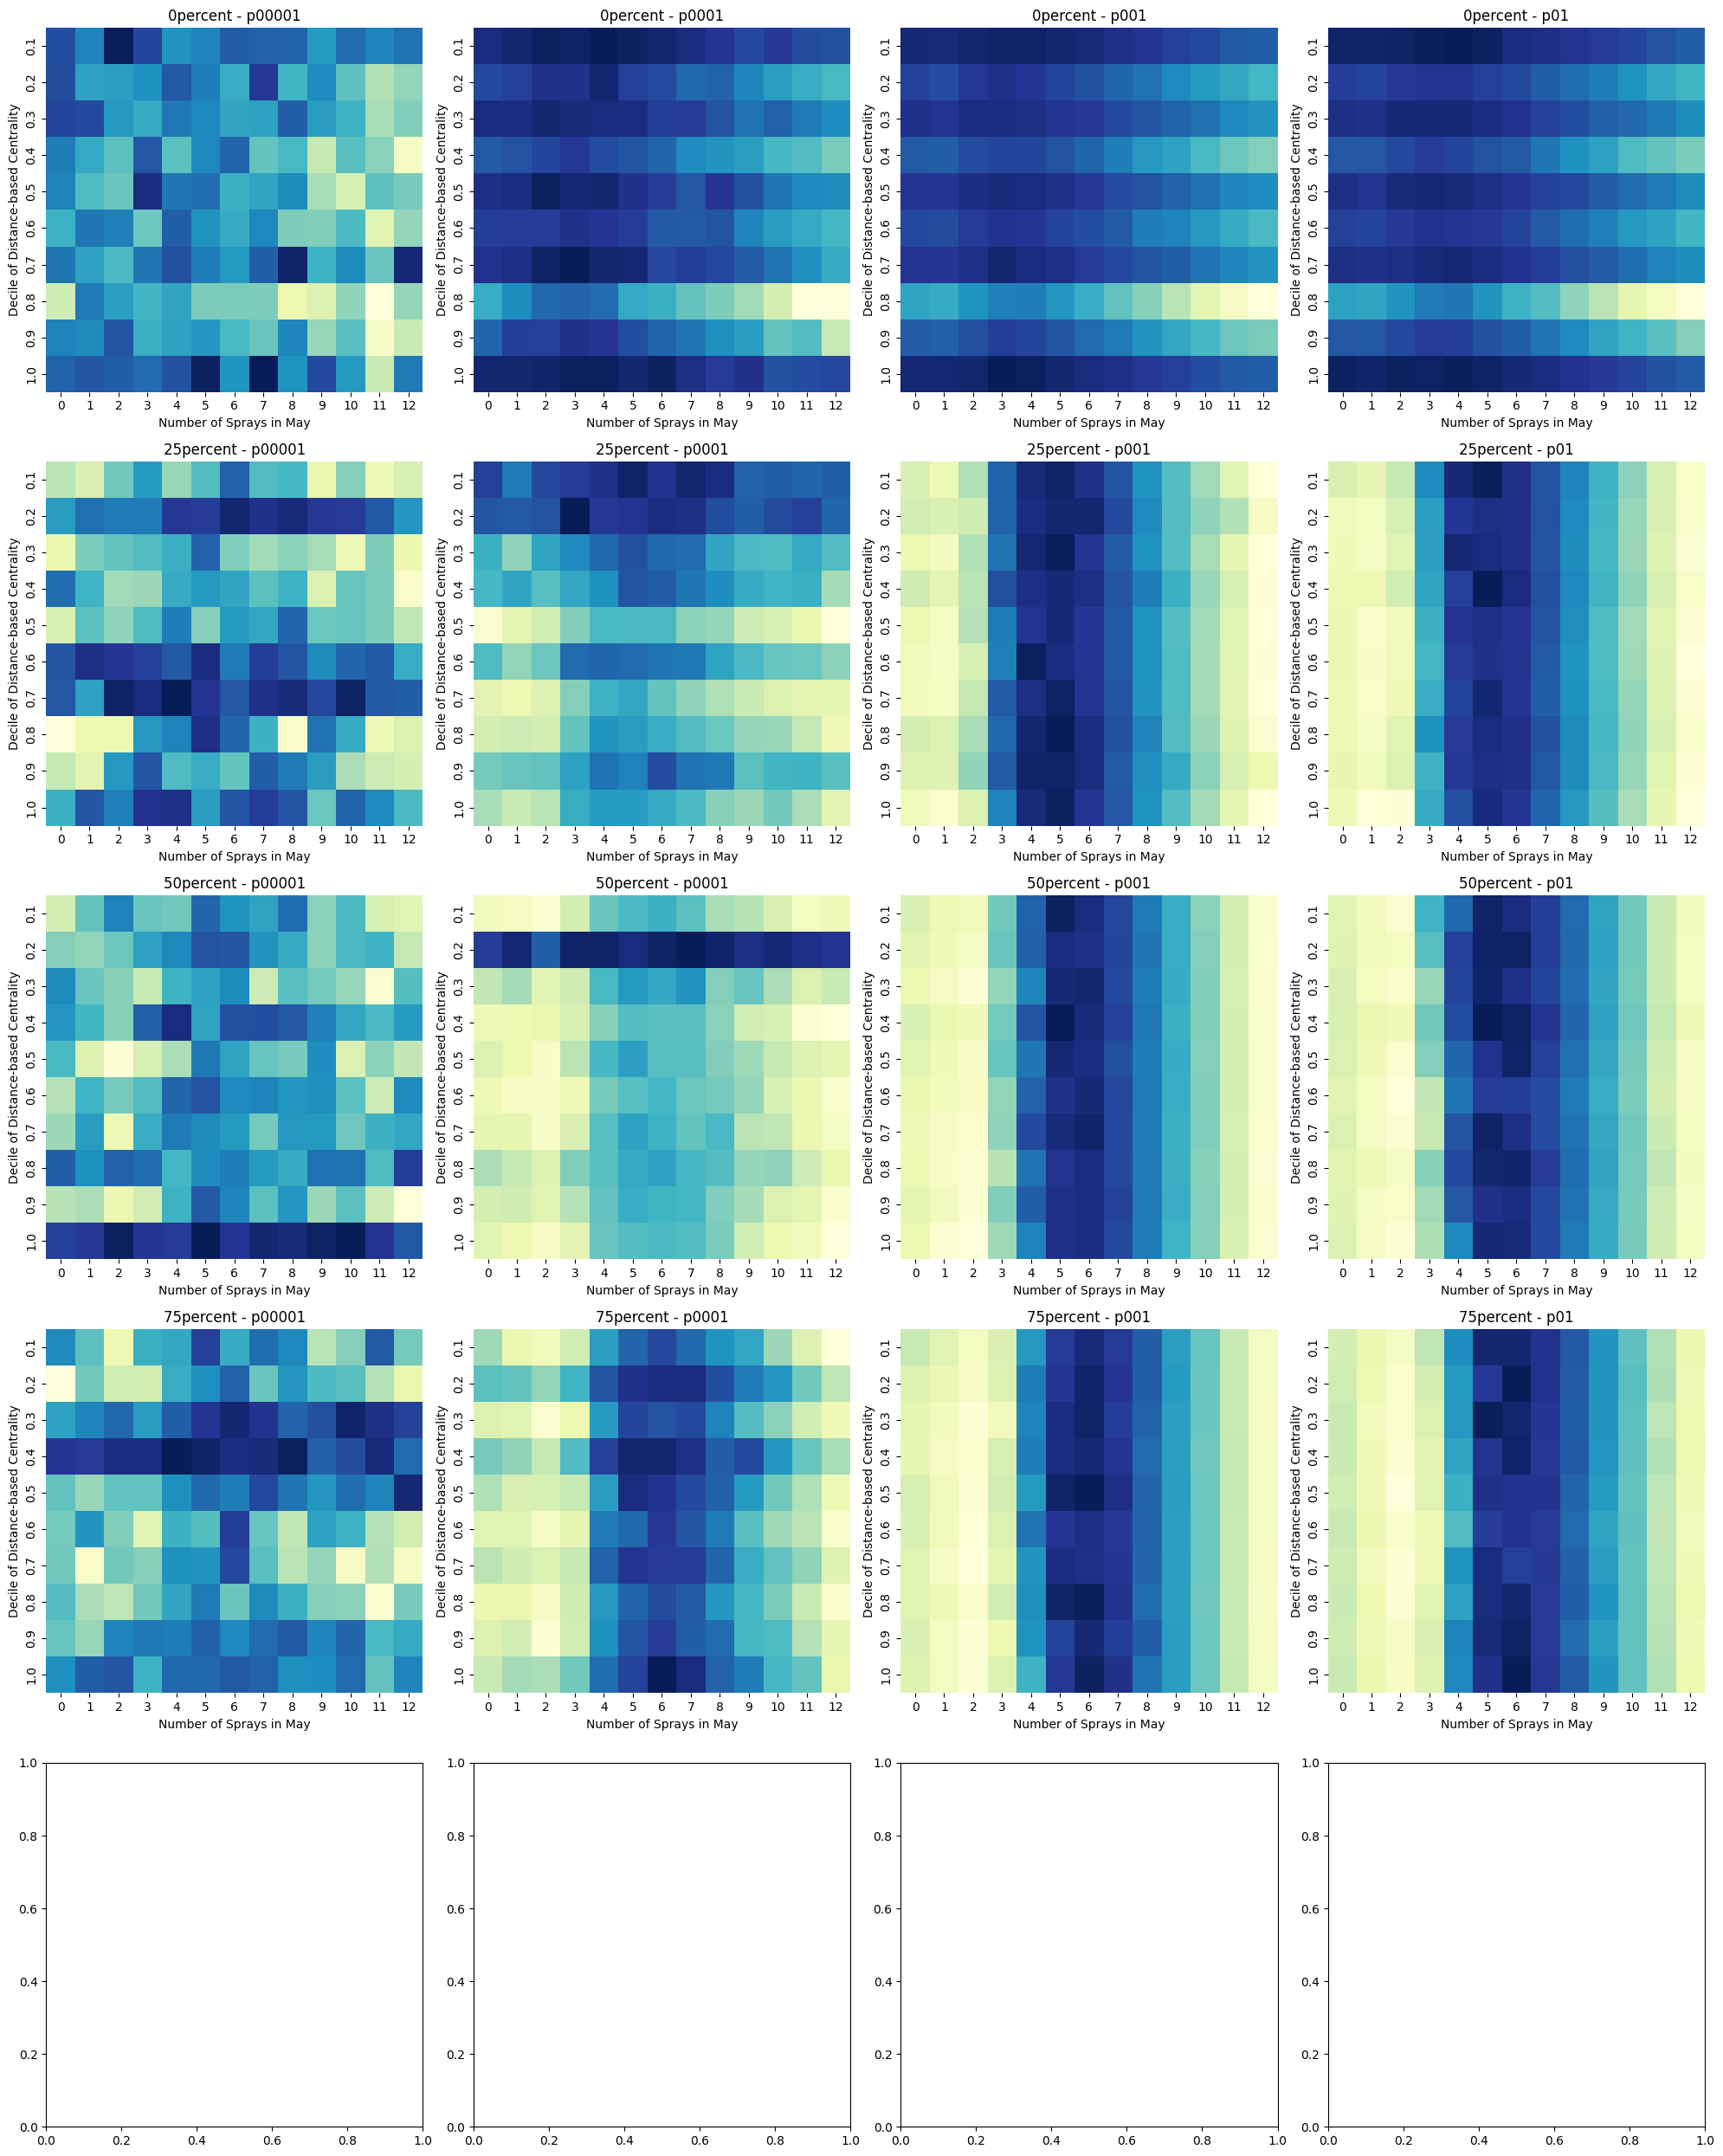

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Base directory for the files
base_dir = "../data/processed/simulations/"

# List of files with directory structure, including the new 0% and 25% infection rate files
files = [
    f"{base_dir}/df_profit_all_0percent_p00001.csv", 
    f"{base_dir}/df_profit_all_0percent_p0001.csv", 
    f"{base_dir}/df_profit_all_0percent_p001.csv", 
    f"{base_dir}/df_profit_all_0percent_p01.csv",
    f"{base_dir}/df_profit_all_25percent_p00001.csv", 
    f"{base_dir}/df_profit_all_25percent_p0001.csv", 
    f"{base_dir}/df_profit_all_25percent_p001.csv", 
    f"{base_dir}/df_profit_all_25percent_p01.csv",
    f"{base_dir}/df_profit_all_50percent_p00001.csv", 
    f"{base_dir}/df_profit_all_50percent_p0001.csv", 
    f"{base_dir}/df_profit_all_50percent_p001.csv", 
    f"{base_dir}/df_profit_all_50percent_p01.csv",
    f"{base_dir}/df_profit_all_75percent_p00001.csv", 
    f"{base_dir}/df_profit_all_75percent_p0001.csv", 
    f"{base_dir}/df_profit_all_75percent_p001.csv", 
    f"{base_dir}/df_profit_all_75percent_p01.csv"
]

# Set up the matplotlib figure with 5x4 layout
fig, axes = plt.subplots(5, 4, figsize=(20, 25))  # Adjust the size as needed

# Iterate over each file and subplot index
for i, file in enumerate(files):
    # Load the data
    df_profit_all = pd.read_csv(file)

    # Create pivot table
    pivot_profit = df_profit_all.pivot_table(values='mean_profit', index='quartile', columns='lambda_may', aggfunc=np.mean)

    # Plot heatmap
    row, col = i // 4, i % 4
    ax = sns.heatmap(pivot_profit, cmap="YlGnBu", annot=False, fmt=".2f", cbar=False, ax=axes[row][col])
    ax.set_title(file.split('/')[-1].split('_')[3] + " - " + file.split('/')[-1].split('_')[4].split('.')[0])
    ax.set_xlabel('Number of Sprays in May')
    ax.set_ylabel('Decile of Distance-based Centrality')

plt.tight_layout()
plt.show()


In [13]:
np.load('../reports/parameters/theta_jun-jul_2014_SLSQP.npy', allow_pickle=True)

array([[ -2.64383869],
       [ -3.07897399],
       [ 57.19160484],
       [ 32.66357326],
       [101.3930581 ],
       [389.86888937],
       [  5.34867418],
       [ 97.18103767],
       [ 54.98064443],
       [ 86.67070659],
       [  0.27770459],
       [  0.09944729]])

In [51]:
# OPTIMIZATION WITH ADAM

# Initialize fitting parameters
#theta = np.zeros((12,1))  # Create an array of zeros
theta = np.random.normal(0, 100 / np.sqrt(N), size=(12, 1))  # Fill the rest with random numbers

#while True:
    # Initialize fitting parameters
#    theta = np.random.normal(0, 2 / np.sqrt(N), size=(12, 1))
    
#    try:
        # Minimize the cost function and get the optimized parameter values
        #res = minimize(costFunction, theta, method='BFGS', jac=gradient1, hess=hessian, options={'gtol': 1e-5, 'maxiter': 100000, 'disp': True})
#        res = minimize(costFunction, theta, method='BFGS', options={'gtol': 1e-5, 'maxiter': 100000, 'disp': True})
#        theta = res.x
        
#        max_abs_grad = np.max(np.abs(gradient(theta)))
#        min_eig_hess = np.min(np.linalg.eigvalsh(hessian(theta)))
        
#        print('Period: ', period, 'MaxGrad: ', max_abs_grad, 'MinEig: ', min_eig_hess, end='\r')
        
        # Check custom convergence criteria
        #if (max_abs_grad < 1e-5) and (min_eig_hess > 0) and np.max(np.abs(theta)) < 500000:
#        if (max_abs_grad < 1e-5) and np.max(np.abs(theta)) < 500000:
#            break
#    except np.linalg.LinAlgError:
#        print('LinAlgError: eigenvalues did not converge. Retrying...')

alpha = 0.05
tolerance = 1e-5
theta = np.load('../reports/parameters/theta_may-jun_SLSQP_2.npy', allow_pickle=True)

    
    # Initialize fitting parameters
    #theta = np.random.normal(-0.5, 0.5, size=(12, 1))
    
    # Minimize the cost function and get the optimized initial parameter values
    #res = minimize(costFunction, theta, method='BFGS', jac=gradient1, hess=hessian, options={'gtol': 1e-8, 'maxiter': 100000, 'disp': True})
    #theta = res.x
    #theta = theta.reshape(12, 1)
    
    #if period == 'may-jun':
        
    #    theta = np.load('../reports/parameters/theta_may-jun_2017_num_1.npy', allow_pickle=True)
    
    #elif period == 'jun-jul':
        
    #    theta = np.load('../reports/parameters/theta_jun-jul_2017_num_1.npy', allow_pickle=True)
        
    #theta = theta.reshape(12, 1)
    
#theta = np.load('../reports/theta2.npy')

# Gradient descent settings
iterations = 200

theta, J_history, g = adam_with_decay(theta, initial_alpha=alpha, num_iters=iterations, decay_rate=1, decay_steps=5000, tolerance=tolerance)

#print('iteration start:\t{:.3f}'.format(np.int32(checkpoint[1])))
#print('previous final cost:\t{:.3f}'.format(checkpoint[2]))
#print('updated final cost:\t{:.3f}'.format(J_history[-1]))
#print('theta: \n', theta)

#plt.plot(list(range(1, len(J_history) + 1)), J_history)
#plt.xlabel('iterations')
#plt.ylabel('cost')


#plt.show()

# Save trained parameters

#iterations += checkpoint[1]
checkpoint = np.array([theta, iterations, J_history, g], dtype=object)

theta_list.append(theta)
checkpoint_list.append(checkpoint)

if (period == 'may-jun'):
    
    np.save('../reports/parameters/checkpoints/mle_checkpoint_may-jun.npy', checkpoint)

elif (period == 'jun-jul'):
    
    np.save('../reports/parameters/checkpoints/mle_checkpoint_jun-jul.npy', checkpoint)

Period:  may-jun # 0 cost:  23.768007 MaxGrad:  0.02131780753309494 MinEig:  -8.61066590100747e-08 MaxTheta:  4 MaxThetaValue:  32700.5418 alpha:  0.05
Period:  may-jun # 100 cost:  23.746041 MaxGrad:  0.00012133961569267863 MinEig:  2.1713283349664635e-09 MaxTheta:  4 MaxThetaValue:  32700.5348 alpha:  0.05


In [54]:
theta

array([[   -2.35428615],
       [   -4.13761336],
       [ 1865.02368974],
       [  121.62138722],
       [32700.53624237],
       [ 1567.59369727],
       [    8.96142773],
       [   30.07483302],
       [    3.33742316],
       [    1.64013969],
       [   22.35033082],
       [   -0.02573005]])

$$
\pi=\sum_{i=1}^{N}\biggl(R\left(p_{i}\right)-C\left(\bar{x}_{i}\right)-C\left(s_{i}\right)\biggr)
$$

$$
\max _{s_{1}, \ldots, s_{N}} \pi=\max _{s_{1}, \ldots, s_{N}} \sum_{i=1}^{N}\biggl(R\left(p_{i}\right)-C\left(\bar{x}_i\right)-C\left(s_{i}\right)\biggr)
$$

## Function

$$
\log \left(\frac{p_i}{1-p_i}\right)=\sum_{k=1}^{K} I_{k}^{(t)}(i)\left[\beta_{k}+\delta_{k}\left(\frac{\tilde{y}_{i}}{n_{\tilde{y}_{i}}} \exp{\left(-\eta_{1k} s_{i}\right)}\right)+\gamma_{k} \sum_{j=1}^{M_{i}}\left(\frac{a_{j} z_{j}}{n_{z_{j}}} \exp{\left(-\eta_{2k} s_{j}\right)} w_{i j} \exp{\left(-\alpha_{k} d_{i j}\right)} I_{k}^{(s)}(j)\right)\right]
$$

## Derivatives

$$
\begin{align*}
\frac{\partial \eta_{i}}{\partial \beta_{k}} &= I_{k}^{(t)}(i) \\

\frac{\partial \eta_{i}}{\partial \delta_{k}} &= I_{k}^{(t)}(i)\left(\frac{\tilde{y}_{i}}{n_{\tilde{y}_{i}}}\right) \exp \left(-\eta_{1 k} s_{i}\right) \\

\frac{\partial \eta_{i}}{\partial \eta_{1 k}} &= -I_{k}^{(t)}(i) \delta_{k} s_{i}\left(\frac{\tilde{y}_{i}}{n_{\tilde{y}_{i}}}\right) \exp \left(-\eta_{1 k} s_{i}\right) \\

\frac{\partial \eta_{i}}{\partial \eta_{2 k}} &= -\gamma_{k} I_{k}^{(t)}(i) \sum_{j=1}^{M_{i}}\left[\left(\frac{a_{j} z_{j}}{n_{z j}}\right) \exp \left(-\eta_{2 k} s_{j}\right) w_{i j} \exp \left(-\alpha_{k} d_{i j}\right) I_{k}^{(s)}(j) s_{j}\right] \\

\frac{\partial \eta_{i}}{\partial \gamma_{k}} &= I_{k}^{(t)}(i) \sum_{j=1}^{M_{i}}\left[\left(\frac{a_{j} z_{j}}{n_{z_{j}}}\right) \exp \left(-\eta_{2 k} s_{j}\right) w_{i j} \exp \left(-\alpha_{k} d_{i j}\right) I_{k}^{(s)}(j)\right] \\

\frac{\partial \eta_{i}}{\partial \alpha_{k}} &= -\gamma_{k} I_{k}^{(t)}(i) \sum_{j=1}^{M_{i}}\left[\left(\frac{a_{j} z_{j}}{n_{z_{j}}}\right) \exp \left(-\eta_{2 k} s_{j}\right) w_{i j} \exp \left(-\alpha_{k} d_{i j}\right) I_{k}^{(s)}(j) d_{i j}\right]
\end{align*}
$$

### Cost Function

$$J(\theta) = 
-\frac{1}{N} \sum_{i=1}^{N} y_{i} \eta_{i}-n_{i} \log \left(1+e^{\eta_{i}}\right)
$$

### Gradient

$$\frac{\partial J}{\partial \theta} =
-\frac{1}{N}\sum_{i=1}^{N} \frac{\partial \eta_{i}}{\partial \theta}\left(y_{i}-\frac{n_{i}}{1+e^{-\eta_{i}}}\right)
$$


### Hessian

$$\frac{\partial^2 J}{\partial \theta^2} = -\frac{1}{N}
\sum_{i=1}^{N}\left[\frac{\partial^{2} \eta_{i}}{\partial \theta^{2}}\left(y_{i}-\frac{n_{i}}{1+e^{-\eta_{i}}}\right)- n_{i} \left(\frac{\partial \eta_{i}}{\partial \theta}\right)^{2}\frac{e^{-\eta_{i}}}{\left(1+e^{-\eta_{i}}\right)^2}\right]
$$

## Optimization

In [50]:
#checkpoint = np.array([theta, iterations, J_history], dtype=object)
#np.save('../reports/checkpoint_June_July2_backup.npy', checkpoint)

In [45]:
checkpoint = np.load('../reports/checkpoint_June_July2.npy', allow_pickle=True)
theta = checkpoint[0]

In [238]:
theta

array([[    1.5457632 ],
       [   -0.07547458],
       [   -4.8742034 ],
       [   51.98424236],
       [-3122.39869964],
       [-4194.55086314],
       [   -5.29015772],
       [   -5.85815199],
       [   -6.70538574],
       [   -0.91393116],
       [   -0.59329742],
       [    0.02099419]])

## Parameter Estimation

## Function

$$
\eta_{i}=\sum_{k=1}^{K} I_{k}^{(t)}(i)\left[\beta_{k}+\delta_{k}\left(\frac{\tilde{y}_{i}}{n_{\tilde{y}_{i}}} \exp{\left(-\eta_{1k} s_{i}\right)}\right)+\gamma_{k} \sum_{j=1}^{M_{i}}\left(\frac{a_{j} z_{j}}{n_{z_{j}}} \exp{\left(-\eta_{2k} s_{j}\right)} w_{i j} \exp{\left(-\alpha_{k} d_{i j}\right)} I_{k}^{(s)}(j)\right)\right]
$$

$$\beta_1 = -2.89902093$$
$$\beta_2 = -4.33376942$$
$$\delta_1 = 3.86406603$$
$$\delta_2 = 7.1830044$$
$$\gamma_1 = 0.06209235$$
$$\gamma_2 = 6.21221296$$
$$\alpha_1 = 0.17578305$$
$$\alpha_2 = 1.31264131$$
$$\eta_{11} = 0.13978209$$
$$\eta_{12} = 0.40521989$$
$$\eta_{21} = -0.79182359$$
$$\eta_{22} = 0.55742334$$

## Eigenvalues of Hessian

In [61]:
np.linalg.eigvalsh(hessian(theta_numpy))

array([   0.        ,    0.00000037,    0.00000144,    0.00000554,
          0.00212706,    0.00660576,    0.02351497,    0.40513871,
          2.03226417,    3.69983217,  715.52475767, 2615.2486514 ])

## Gradient

In [11]:
gradient(theta)

array([[ 0.00035165],
       [ 0.00000092],
       [ 0.00093506],
       [-0.00000046],
       [ 0.00370447],
       [-0.00027325],
       [-0.00982039],
       [-0.00226836],
       [-0.00229518],
       [ 0.00000655],
       [-0.00047533],
       [ 0.00037915]])

In [31]:
nGrad = nd.Gradient(costFunction)
nHess = nd.Hessian(costFunction)
hess_theta = nHess(theta.reshape(12,))
grad_theta = nGrad(theta.reshape(12,))

In [10]:
def prob(theta):
    
    p = 1 / (1 + np.exp(-eta(theta)))
    
    return p

In [12]:
print('estimated probability of disease: \n', prob(theta))

estimated probability of disease: 
 [[0.02611759]
 [0.02631787]
 [0.02620498]
 [0.03368977]
 [0.02623533]
 [0.02624147]
 [0.02745905]
 [0.02710209]
 [0.04514933]
 [0.04289552]
 [0.16258389]
 [0.03171659]
 [0.15754236]
 [0.03329544]
 [0.02628519]
 [0.02748307]
 [0.02906667]
 [0.02786479]
 [0.02657169]
 [0.02892042]
 [0.02622809]
 [0.04582204]
 [0.5       ]
 [0.84480418]
 [0.24196183]
 [0.2553849 ]
 [0.33620011]
 [0.02684969]
 [0.49306239]
 [0.80226981]
 [0.53574716]
 [0.41690551]
 [0.91858263]
 [0.14165495]
 [0.        ]
 [0.02439342]
 [0.02535986]
 [0.02457473]
 [0.02567178]
 [0.17610494]
 [0.02407955]
 [0.01639678]
 [0.01495841]
 [0.02234735]
 [0.02345555]
 [0.02276539]
 [0.5       ]
 [0.02272612]
 [0.02457618]
 [0.11173597]
 [0.10794024]
 [0.22234288]
 [0.14008519]
 [0.2470191 ]
 [0.24700966]
 [0.02734554]
 [0.25025533]
 [0.02731197]
 [0.2534015 ]
 [0.02732704]
 [0.24922973]
 [0.02735182]
 [0.02728799]
 [0.02733912]
 [0.02321656]
 [0.02306974]
 [0.02242573]
 [0.5       ]
 [0.02569351

In [13]:
prob(theta).shape

(104, 1)